##### Exploring data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn import preprocessing
from bioinfokit.visuz import cluster
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from collections import Counter
from statsmodels.graphics.mosaicplot import mosaic
from itertools import product

In [2]:
dt = pd.read_csv("mcdonalds.csv")

In [3]:
dt.columns

Index(['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting', 'Like', 'Age',
       'VisitFrequency', 'Gender'],
      dtype='object')

In [4]:
dt.shape

(1453, 15)

In [5]:
dt.head(3)

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female


In [6]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1453 entries, 0 to 1452
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   yummy           1453 non-null   object
 1   convenient      1453 non-null   object
 2   spicy           1453 non-null   object
 3   fattening       1453 non-null   object
 4   greasy          1453 non-null   object
 5   fast            1453 non-null   object
 6   cheap           1453 non-null   object
 7   tasty           1453 non-null   object
 8   expensive       1453 non-null   object
 9   healthy         1453 non-null   object
 10  disgusting      1453 non-null   object
 11  Like            1453 non-null   object
 12  Age             1453 non-null   int64 
 13  VisitFrequency  1453 non-null   object
 14  Gender          1453 non-null   object
dtypes: int64(1), object(14)
memory usage: 170.4+ KB


In [7]:
# Extract the first 11 columns and convert them to a NumPy array
MD = dt.iloc[:, 0:11]
MD.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No


In [8]:
MD.describe()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting
count,1453,1453,1453,1453,1453,1453,1453,1453,1453,1453,1453
unique,2,2,2,2,2,2,2,2,2,2,2
top,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,No
freq,803,1319,1317,1260,765,1308,870,936,933,1164,1100


In [9]:
MD.count()

yummy         1453
convenient    1453
spicy         1453
fattening     1453
greasy        1453
fast          1453
cheap         1453
tasty         1453
expensive     1453
healthy       1453
disgusting    1453
dtype: int64

In [10]:
MD.nunique()

yummy         2
convenient    2
spicy         2
fattening     2
greasy        2
fast          2
cheap         2
tasty         2
expensive     2
healthy       2
disgusting    2
dtype: int64

In [11]:
for column in MD:
    print(MD[column].value_counts())

Yes    803
No     650
Name: yummy, dtype: int64
Yes    1319
No      134
Name: convenient, dtype: int64
No     1317
Yes     136
Name: spicy, dtype: int64
Yes    1260
No      193
Name: fattening, dtype: int64
Yes    765
No     688
Name: greasy, dtype: int64
Yes    1308
No      145
Name: fast, dtype: int64
Yes    870
No     583
Name: cheap, dtype: int64
Yes    936
No     517
Name: tasty, dtype: int64
No     933
Yes    520
Name: expensive, dtype: int64
No     1164
Yes     289
Name: healthy, dtype: int64
No     1100
Yes     353
Name: disgusting, dtype: int64


In [12]:
dt['Like'].value_counts()

+3              229
+2              187
0               169
+4              160
+1              152
I hate it!-5    152
I love it!+5    143
-3               73
-4               71
-2               59
-1               58
Name: Like, dtype: int64

In [13]:
dt['Age'].value_counts()

55    53
60    38
37    37
52    36
59    36
57    36
58    35
36    35
62    34
50    34
49    34
32    33
44    32
64    32
56    32
26    31
53    31
35    30
51    30
23    30
42    30
24    30
47    30
39    29
34    28
30    28
29    28
31    27
40    27
38    27
25    26
33    26
48    26
61    26
67    26
43    25
63    25
27    25
54    24
41    23
65    23
22    23
45    22
20    21
46    19
28    18
66    17
18    16
21    16
70    15
69    14
68    13
19    10
71     1
Name: Age, dtype: int64

In [14]:
dt['VisitFrequency'].value_counts()

Once a month             439
Every three months       342
Once a year              252
Once a week              235
Never                    131
More than once a week     54
Name: VisitFrequency, dtype: int64

In [15]:
dt['Gender'].value_counts()

Female    788
Male      665
Name: Gender, dtype: int64

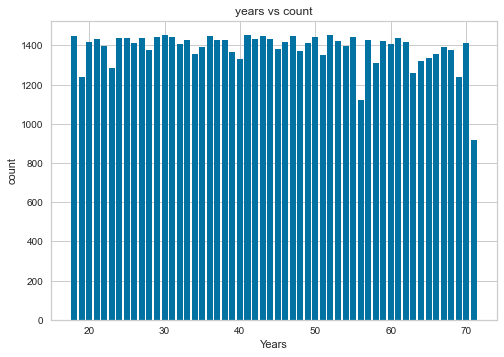

In [16]:
X = list(dt.iloc[:, 12])
y = list(range(1,1454))
plt.bar(X,y)
plt.title("years vs count")
plt.xlabel("Years")
plt.ylabel("count")

plt.show()

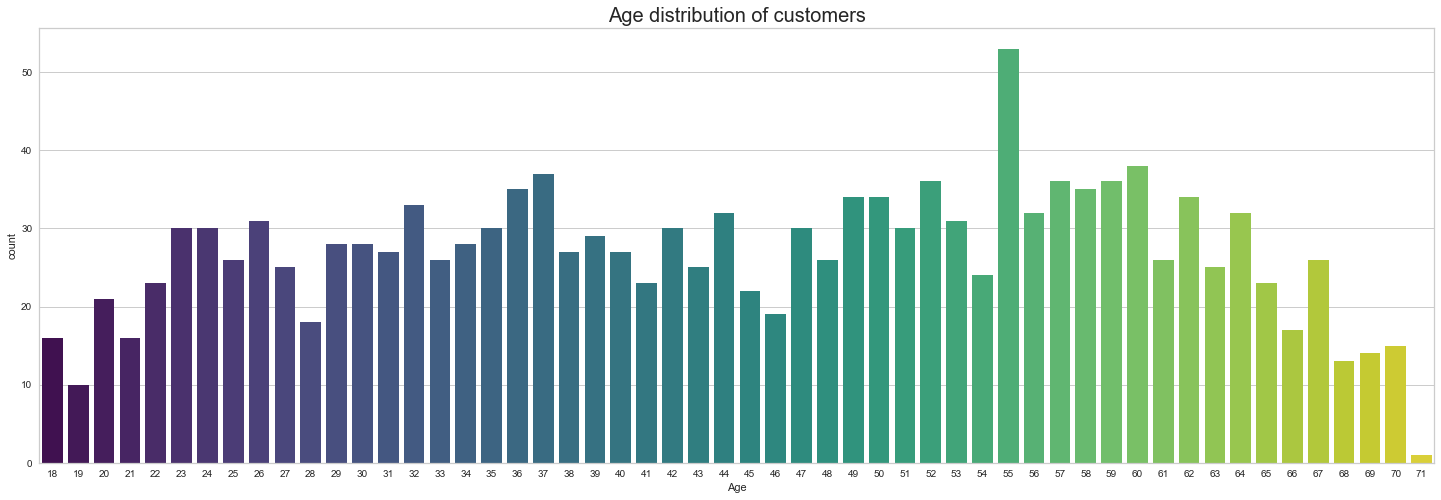

In [17]:
plt.rcParams['figure.figsize'] = (25, 8)
data = sns.countplot(x=dt['Age'], palette = 'viridis')
plt.title('Age distribution of customers', fontsize = 20)
plt.show()

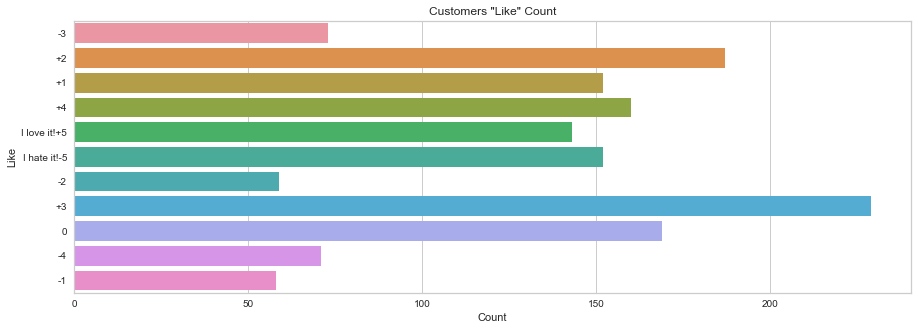

In [18]:
plt.figure(figsize = (15 , 5))
sns.countplot(y = 'Like' , data = dt)
plt.xlabel('Count')
plt.ylabel('Like')
plt.title('Customers "Like" Count')
plt.show()

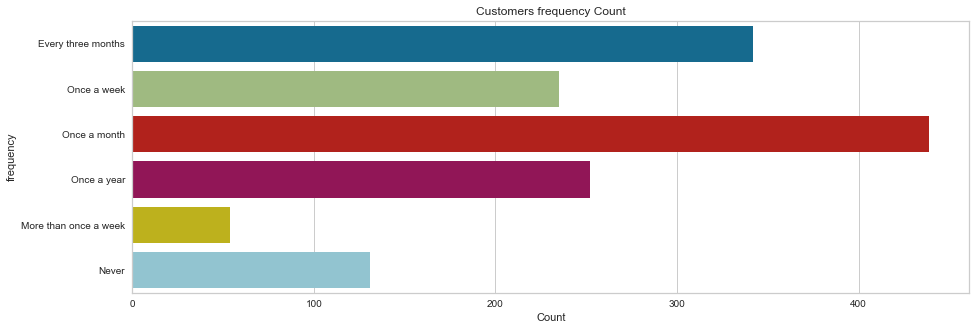

In [19]:
plt.figure(figsize = (15 , 5))
sns.countplot(y = 'VisitFrequency' , data = dt)
plt.xlabel('Count')
plt.ylabel('frequency')
plt.title('Customers frequency Count')
plt.show()

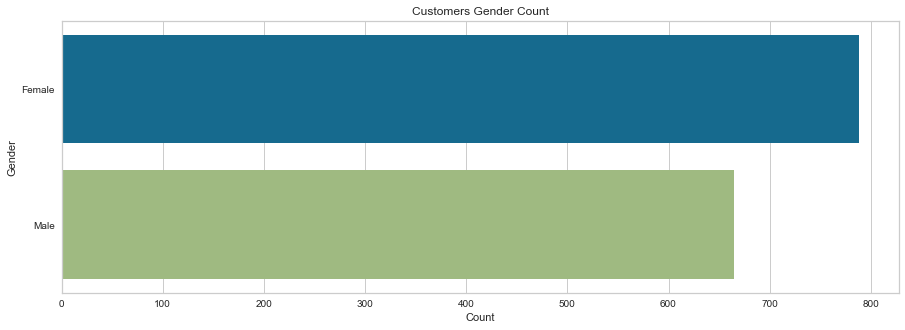

In [20]:
plt.figure(1 , figsize = (15 , 5))
sns.countplot(y = 'Gender' , data = dt)
plt.xlabel('Count')
plt.ylabel('Gender')
plt.title('Customers Gender Count')
plt.show()

##### Data Preprocessing

In [21]:
#as these columns does not contain binary output we will remove them 
data_new = dt.drop(labels=['Like','Age','VisitFrequency','Gender'], axis=1) 
data_new.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No


In [22]:
label_encoder = preprocessing.LabelEncoder()
data1= data_new.apply(label_encoder.fit_transform)
data1

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting
0,0,1,0,1,0,1,1,0,1,0,0
1,1,1,0,1,1,1,1,1,1,0,0
2,0,1,1,1,1,1,0,1,1,1,0
3,1,1,0,1,1,1,1,1,0,0,1
4,0,1,0,1,1,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
1448,0,1,0,1,1,0,0,0,1,0,1
1449,1,1,0,1,0,0,1,1,0,1,0
1450,1,1,0,1,0,1,0,1,1,0,0
1451,1,1,0,0,0,1,1,1,0,1,0


##### Performing PCA

In [23]:
# Perform PCA
pca_data = preprocessing.scale(data1)
pca = PCA(n_components=11)
PC = pca.fit_transform(pca_data)
principalDf = pd.DataFrame(data = PC, columns = ['yummy','convenient','spicy','fattening','greasy','fast','cheap','tasty','expensive','healty','disgusting'])

In [24]:
principalDf.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healty,disgusting
0,0.704334,-0.437016,0.268698,-0.872074,-1.521184,0.470160,-0.030969,-0.687116,0.367598,0.321161,1.701170
1,-0.467820,0.364277,-1.596835,-0.004835,0.462385,-0.449321,0.087351,0.446003,0.221855,0.191268,1.467681
2,0.191986,1.712949,-0.339413,3.368168,-1.266802,0.148058,-0.606634,-0.668576,1.377226,-1.259300,-0.128530
3,-0.116991,-1.155122,-1.003913,0.469589,1.141750,-0.857182,0.015843,0.390275,-1.578539,0.092189,-0.233201
4,-0.034724,-1.390267,0.792275,0.473031,-0.270488,-0.847963,-1.804085,-0.700019,1.630339,0.092449,-0.033144


In [25]:
pca.explained_variance_ratio_

array([0.25556637, 0.14834762, 0.12546909, 0.09826971, 0.08348356,
       0.07109102, 0.06498559, 0.05384477, 0.04762809, 0.02796379,
       0.0233504 ])

In [26]:
loadings = pca.components_
num_pc = pca.n_features_
pc_list = ["PC"+str(i) for i in list(range(1, num_pc+1))]
loadings_df = pd.DataFrame.from_dict(dict(zip(pc_list, loadings)))
loadings_df['feature'] = data1.columns.values
loadings_df = loadings_df.set_index('feature')
loadings_df

E:\Users\SHALINI\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:101: FutureWarning: Attribute `n_features_` was deprecated in version 1.2 and will be removed in 1.4. Use `n_features_in_` instead.
  warnings.warn(msg, category=FutureWarning)


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
feature,,,,,,,,,,,
yummy,-0.406955,0.282615,-0.259588,0.026237,0.346857,-0.124916,0.159878,0.016587,-0.195341,0.691446,-0.091851
convenient,-0.308827,-0.045682,-0.317151,-0.009424,-0.437148,0.188966,-0.661814,0.150033,-0.336539,0.028831,0.021460
spicy,-0.023320,0.069982,0.020170,0.845496,-0.185551,0.438661,0.214188,-0.027835,0.025239,0.058187,-0.041960
fattening,0.177861,-0.205590,-0.608077,-0.023396,0.086934,0.107520,-0.023851,-0.720478,0.105052,-0.020311,-0.074626
greasy,0.267796,-0.136300,-0.389568,0.330854,0.343713,-0.278329,-0.307300,0.487275,0.346137,-0.015160,-0.031047
fast,-0.213039,-0.282441,-0.211395,0.090363,-0.568939,-0.572734,0.392436,0.055976,0.099235,0.017917,-0.054448
cheap,-0.289134,-0.575032,0.125157,0.114477,0.256981,0.020657,-0.008895,-0.064667,-0.062027,0.060323,0.691923
tasty,-0.426115,0.242199,-0.269648,0.072691,0.286099,-0.053053,0.197364,0.059289,-0.213587,-0.713426,0.006426
expensive,0.290944,0.567528,-0.183298,0.035510,-0.207362,-0.171160,0.015198,-0.061727,-0.009675,0.029581,0.693614


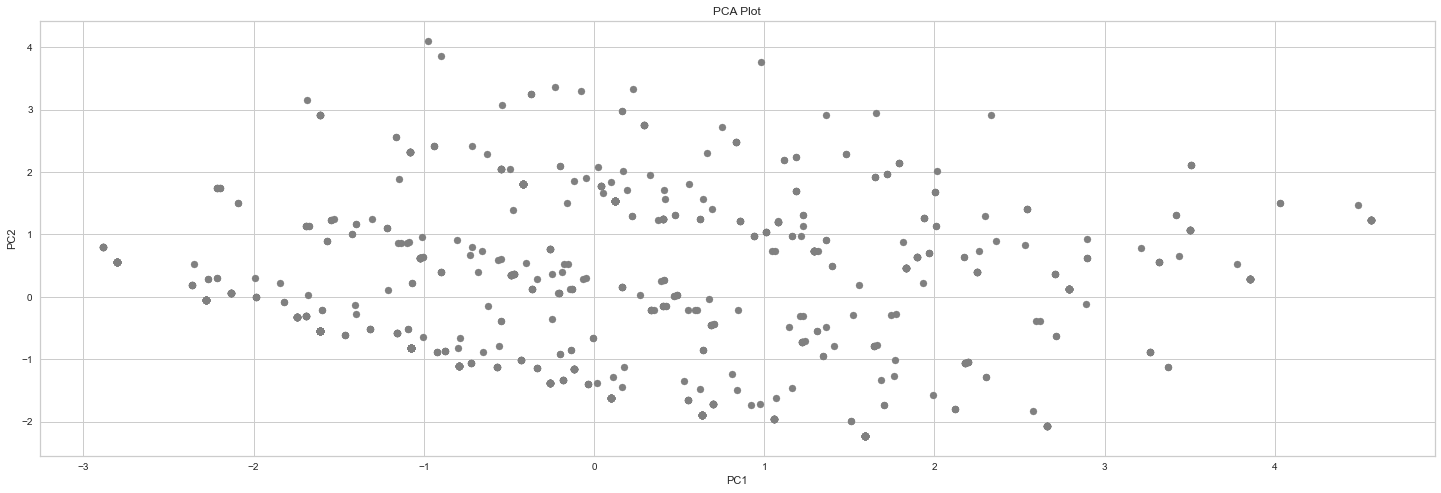

In [27]:
# Plotting the PCA results
plt.scatter(PC[:, 0], PC[:, 1], c="grey")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PCA Plot")
plt.show()

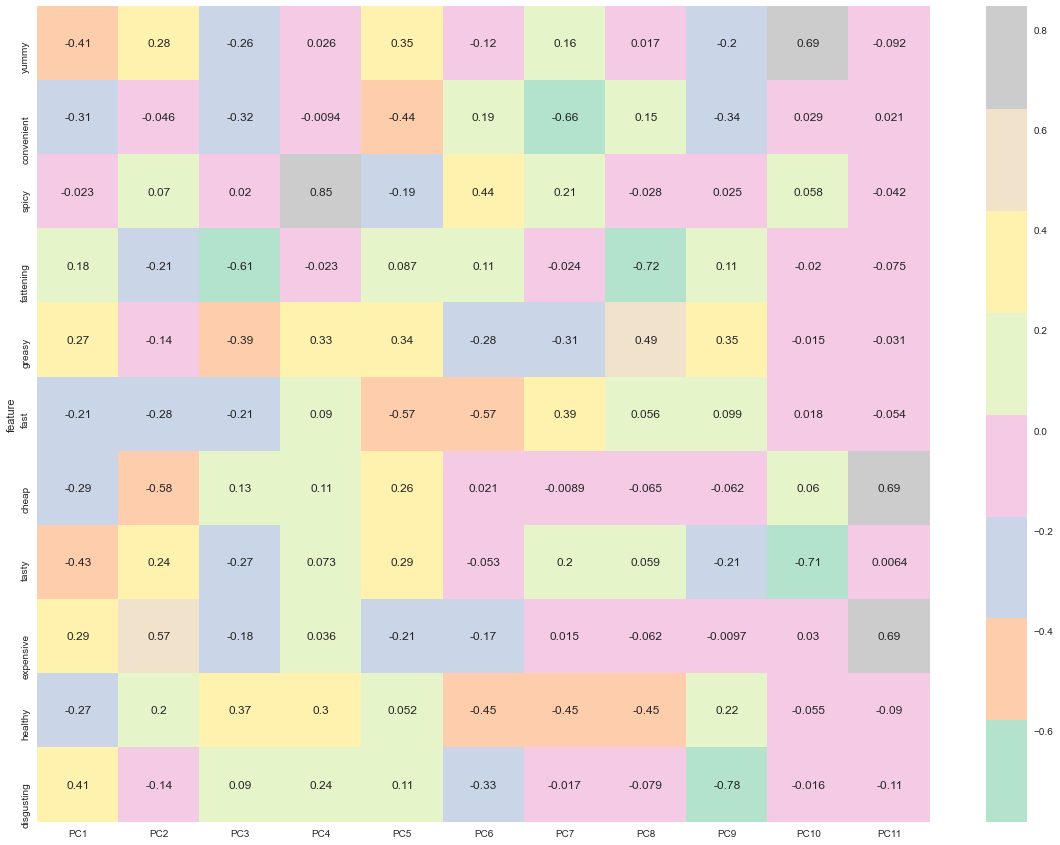

In [28]:
plt.rcParams['figure.figsize'] = (20,15)
ax = sns.heatmap(loadings_df, annot=True, cmap='Pastel2')
plt.show()

In [29]:
#"yellowbrick" library provides various visualizations for machine learning tasks, and in this case, it offers the "KElbowVisualizer" for determining the optimal number of clusters for K-means clustering using the elbow method. 
#pip install bioinfokit

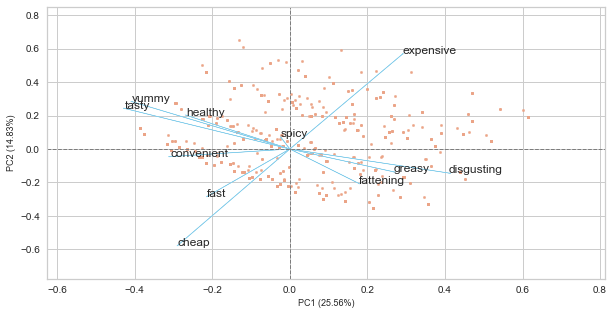

In [30]:
pca_scores = PCA().fit_transform(pca_data)

cluster.biplot(cscore=pca_scores, loadings=loadings, labels=dt.columns.values, 
               var1=round(pca.explained_variance_ratio_[0]*100, 2),
    var2=round(pca.explained_variance_ratio_[1]*100, 2),show=True,dim=(10,5))

##### Applying Elbow Method

E:\Users\SHALINI\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
E:\Users\SHALINI\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
E:\Users\SHALINI\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
E:\Users\SHALINI\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the 

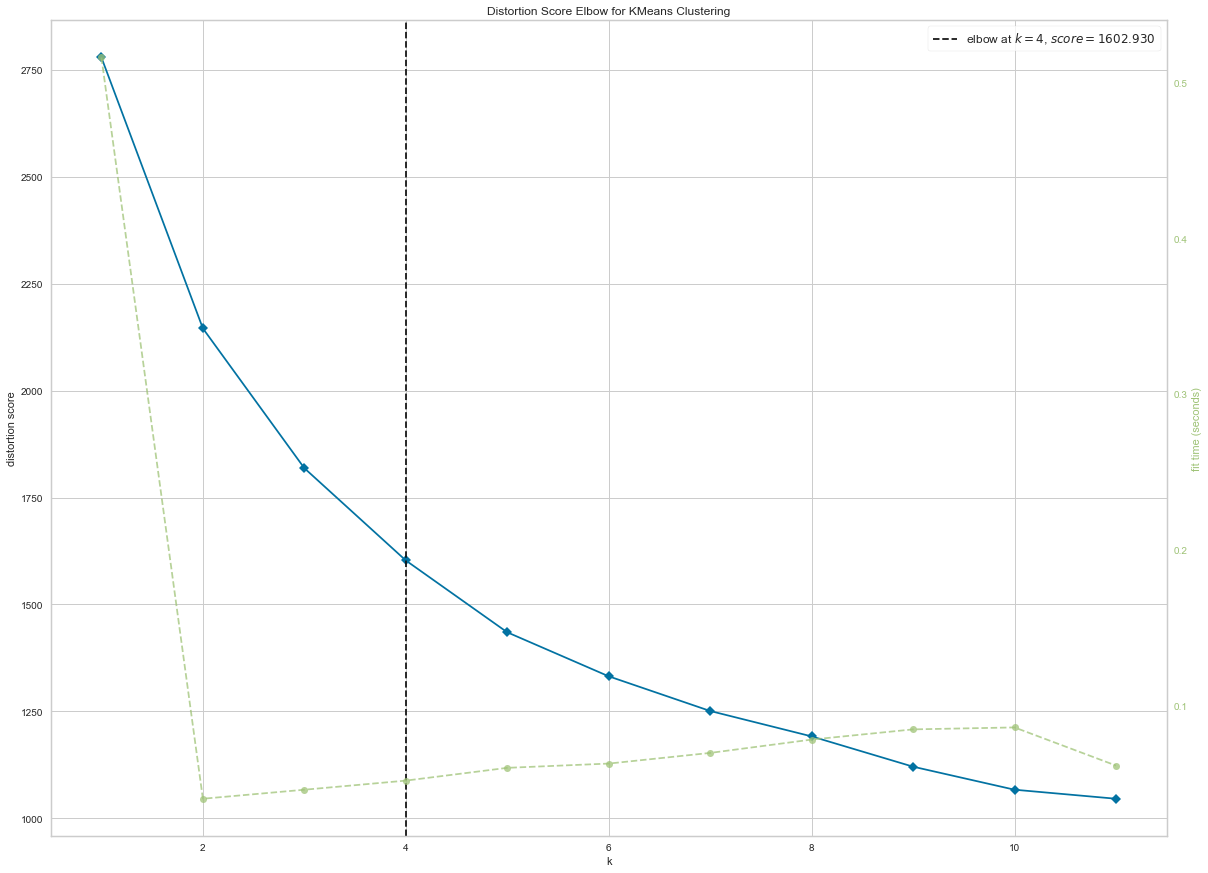

In [31]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,12)).fit(data1)
visualizer.show();
     

##### Extracting Segments

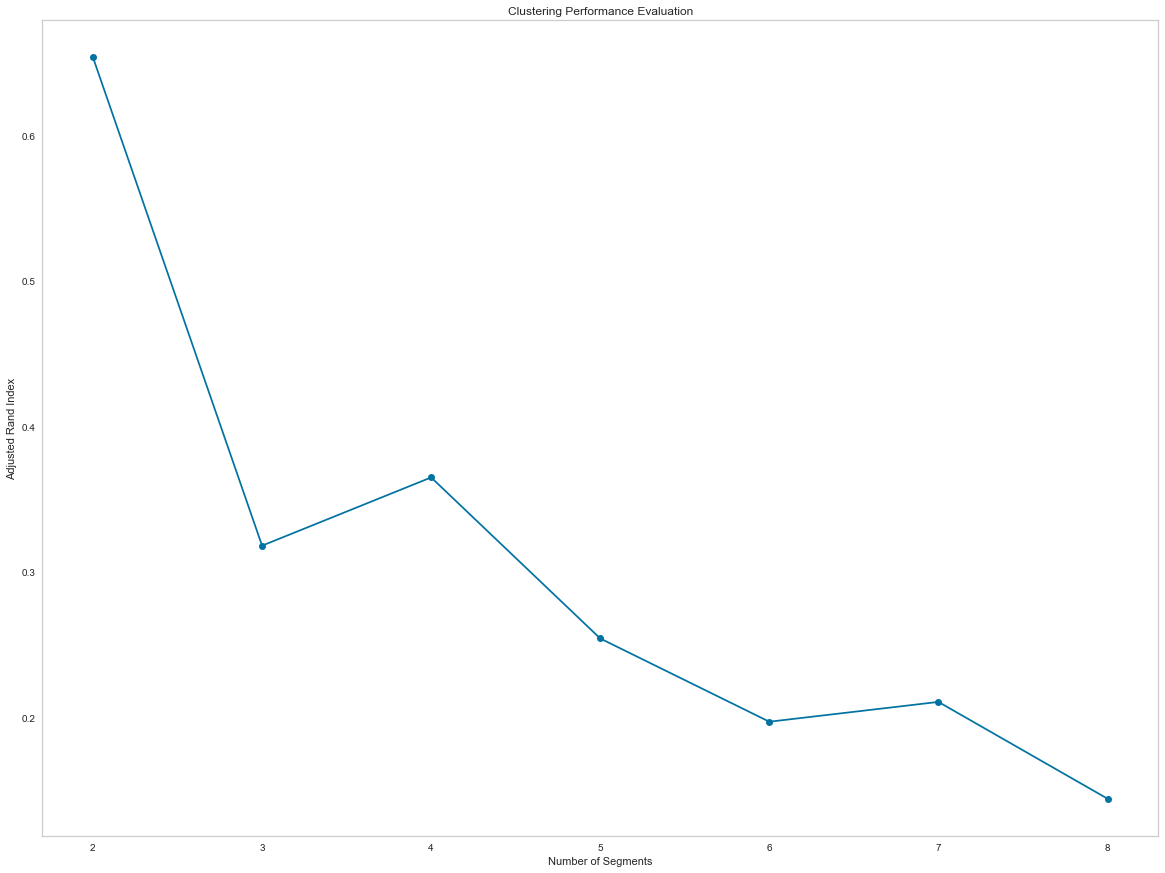

In [32]:
from sklearn import metrics
np.random.seed(1234)

# Perform KMeans clustering for different numbers of clusters (2 to 8)
n_clusters_range = range(2, 9)
adjusted_rand_index = []

for n_clusters in n_clusters_range:
    kmeans = KMeans(n_clusters=n_clusters, n_init=10, random_state=0)
    cluster_labels = kmeans.fit_predict(data1)
    ari = metrics.adjusted_rand_score(data1["yummy"], cluster_labels)
    adjusted_rand_index.append(ari)

# Plot the clustering performance (adjusted Rand index)
plt.plot(n_clusters_range, adjusted_rand_index, marker='o')
plt.xlabel('Number of Segments')
plt.ylabel('Adjusted Rand Index')
plt.title('Clustering Performance Evaluation')
plt.grid()
plt.show()

In [33]:
np.random.seed(1234)
from sklearn.mixture import GaussianMixture
# Perform KMeans clustering for 4 clusters
kmeans = KMeans(n_clusters=4, n_init=10, random_state=0)
kmeans_clusters = kmeans.fit_predict(data1)

# Modeling mixtures using flexmix
# Using GaussianMixture for model selection (you can choose appropriate model based on your data)
model = GaussianMixture(n_components=4, n_init=10, random_state=0)
model.fit(data1)

GaussianMixture(n_components=4, n_init=10, random_state=0)

In [34]:
# Assigning data points to mixture components based on highest posterior probability
mixture_clusters = model.predict(data1)

# Contingency table for comparison
contingency_table = pd.crosstab(index=kmeans_clusters, columns=mixture_clusters, rownames=['kmeans'], colnames=['mixture'])
print(contingency_table)

mixture    0    1   2    3
kmeans                    
0          2  243   7   57
1        138  432  10    0
2        248   27  49    0
3          0   14  39  187


##### Profiling Segments

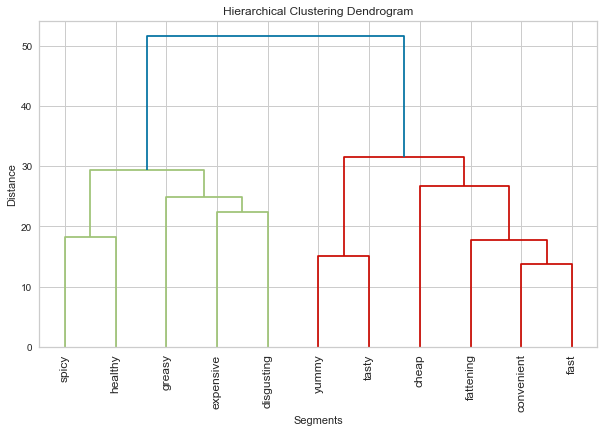

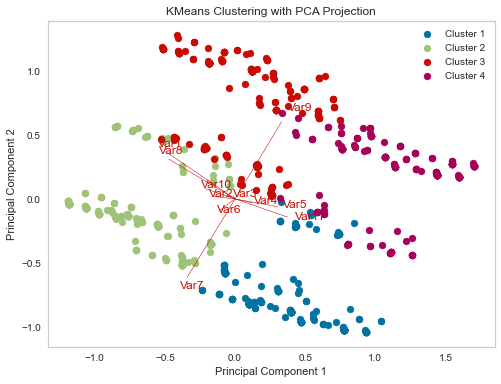

In [35]:
np.random.seed(1234)
from scipy.cluster.hierarchy import dendrogram, linkage
# Perform hierarchical clustering using Ward's method and Euclidean distance
Z = linkage(data1.T, method='ward')

# Plot the dendrogram
plt.figure(figsize=(10, 6))
dendrogram(Z, labels=data1.columns, leaf_rotation=90)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Segments')
plt.ylabel('Distance')
plt.show()

# Plot the KMeans clustering results with PCA projection
kmeans = KMeans(n_clusters=4, n_init=10, random_state=0)
kmeans_clusters = kmeans.fit_predict(data1)

# Perform PCA
pca = PCA()
MD_pca = pca.fit_transform(data1)

# Plot the KMeans clusters with PCA projection
plt.figure(figsize=(8, 6))
for i in range(4):
    plt.scatter(MD_pca[kmeans_clusters == i, 0], MD_pca[kmeans_clusters == i, 1], label=f'Cluster {i + 1}')

# Plot the projection axes (if available)
loadings = np.round(pca.components_, 2)
for i in range(loadings.shape[1]):
    plt.arrow(0, 0, loadings[0, i], loadings[1, i], color='r', alpha=0.75)
    plt.text(loadings[0, i] * 1.15,loadings[1, i] * 1.15, f"Var{i + 1}", color='r')

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('KMeans Clustering with PCA Projection')
plt.legend()
plt.grid()
plt.show()

##### Describing Segments

In [36]:
# k-means clustering 
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=0).fit(data1)
dt['cluster_num'] = kmeans.labels_ #adding to dt
# label assigned for each data point
print ('Labels:', kmeans.labels_)
# gives within-cluster sum of squares (WCSS) 
print ('WCSS:', kmeans.inertia_)
# number of iterations that k-means algorithm runs to get a minimum within-cluster sum of squares
print('No. of iterations: ', kmeans.n_iter_)
# location of the centroids on each cluster
print('Cluster centroids: ', kmeans.cluster_centers_)
# checking each cluster size
print('Cluster size: ', Counter(kmeans.labels_))

Labels: [0 2 2 ... 2 1 3]
WCSS: 1602.9303457472106
No. of iterations:  9
Cluster centroids:  [[0.02265372 0.89320388 0.0776699  0.92556634 0.66019417 0.95145631
  0.91909385 0.15533981 0.01294498 0.07119741 0.38511327]
 [0.88793103 0.98103448 0.0862069  0.79482759 0.32931034 0.96034483
  0.92241379 0.97586207 0.01724138 0.32068966 0.04310345]
 [0.85185185 0.95987654 0.13271605 0.90432099 0.61728395 0.85802469
  0.10802469 0.93209877 0.89814815 0.2037037  0.10493827]
 [0.02083333 0.67916667 0.07916667 0.91666667 0.70833333 0.74583333
  0.06666667 0.08333333 0.89583333 0.0625     0.72916667]]
Cluster size:  Counter({1: 580, 2: 324, 0: 309, 3: 240})


E:\Users\SHALINI\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


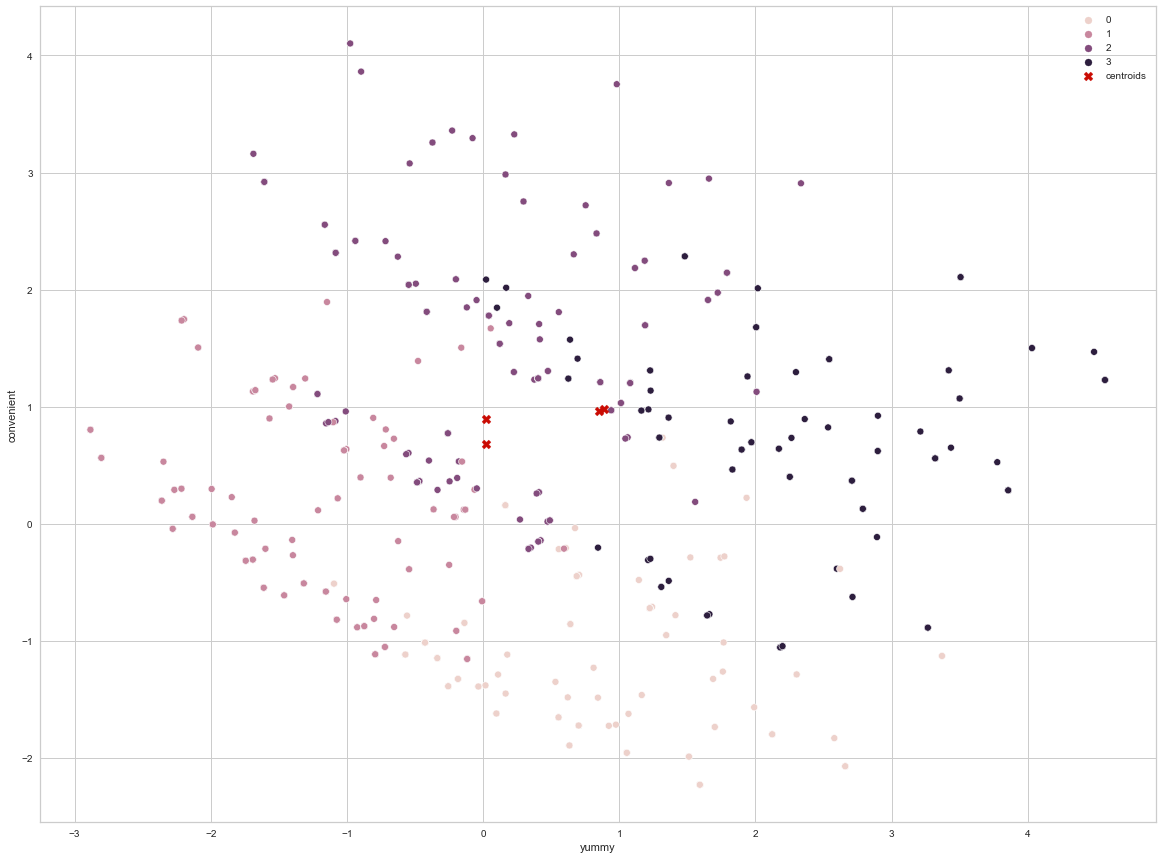

In [37]:
# cluster visualization
sns.scatterplot(data=principalDf, x="yummy", y="convenient", hue=kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], marker="X", c="r", s=80, label="centroids")
plt.legend()
plt.show()

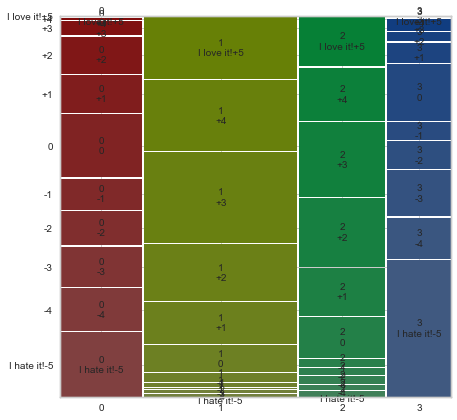

Like,I hate it!-5,-4,-3,-2,-1,0,+1,+2,+3,+4,I love it!+5
cluster_num,,,,,,,,,,,
0,54,36,34,29,26,53,32,31,12,2,0
1,4,4,2,6,13,43,65,90,143,111,99
2,5,4,7,6,7,36,42,60,66,47,44
3,89,27,30,18,12,37,13,6,8,0,0


None

In [38]:
# crosstab creation
crosstab = pd.crosstab(dt['cluster_num'], dt['Like'])
crosstab = crosstab[['I hate it!-5','-4','-3','-2','-1','0','+1','+2','+3','+4','I love it!+5']]
crosstab

# plotting mosaic plot
plt.rcParams['figure.figsize'] = (7,7)
mosaic(crosstab.stack())
display(crosstab, plt.show())

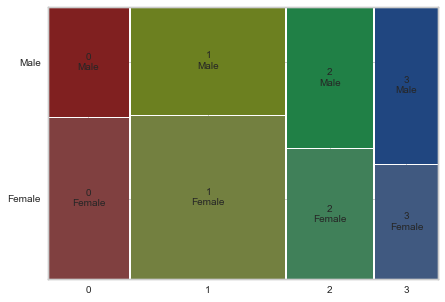

Like,I hate it!-5,-4,-3,-2,-1,0,+1,+2,+3,+4,I love it!+5
cluster_num,,,,,,,,,,,
0,54,36,34,29,26,53,32,31,12,2,0
1,4,4,2,6,13,43,65,90,143,111,99
2,5,4,7,6,7,36,42,60,66,47,44
3,89,27,30,18,12,37,13,6,8,0,0


None

In [39]:
# crosstab creation
crosstab_gender = pd.crosstab(dt['cluster_num'],dt['Gender'])
crosstab_gender

# plotting mosaic plot
plt.rcParams['figure.figsize'] = (7,5)
mosaic(crosstab_gender.stack())
display(crosstab, plt.show())
     

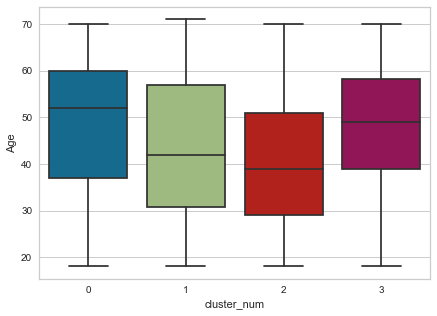

In [40]:
# box plot for 'Age'
sns.boxplot(x="cluster_num", y="Age", data=dt);

##### Selecting the Target Segments

In [41]:
# calculating the mean of 'VisitFrequency'
dt['VisitFrequency'] = LabelEncoder().fit_transform(dt['VisitFrequency'])
visit = dt.groupby('cluster_num')['VisitFrequency'].mean()
visit = visit.to_frame().reset_index()
visit

,cluster_num,VisitFrequency
0,0,2.809061
1,1,2.584483
2,2,2.540123
3,3,2.679167


In [42]:
# calculating the mean of 'Like'
dt['Like'] = LabelEncoder().fit_transform(dt['Like'])
Like = dt.groupby('cluster_num')['Like'].mean()
Like = Like.to_frame().reset_index()
Like

,cluster_num,Like
0,0,5.423948
1,1,3.794828
2,2,3.808642
3,3,6.775000


In [43]:
# calculating the mean of 'Gender'
dt['Gender'] = LabelEncoder().fit_transform(dt['Gender'])
Gender = dt.groupby('cluster_num')['Gender'].mean()
Gender = Gender.to_frame().reset_index()
Gender

,cluster_num,Gender
0,0,0.407767
1,1,0.398276
2,2,0.521605
3,3,0.579167


In [44]:
segment = Gender.merge(Like, on='cluster_num', how='left').merge(visit, on='cluster_num', how='left')
segment   

,cluster_num,Gender,Like,VisitFrequency
0,0,0.407767,5.423948,2.809061
1,1,0.398276,3.794828,2.584483
2,2,0.521605,3.808642,2.540123
3,3,0.579167,6.775000,2.679167


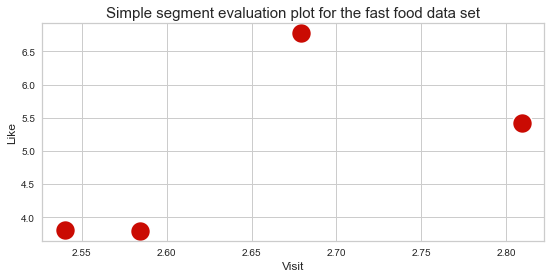

In [45]:
# targeting segments
plt.figure(figsize = (9,4))
sns.scatterplot(x = "VisitFrequency", y = "Like",data=segment,s=400, color="r")
plt.title("Simple segment evaluation plot for the fast food data set", fontsize = 15) 
plt.xlabel("Visit", fontsize = 12) 
plt.ylabel("Like", fontsize = 12) 
plt.show()